In [1]:
import pandas as pd
import numpy as np

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
# Load the data

data_path = '/Users/mdayanarshad/Desktop/vikash das mlops/MLOps-Vehicle-Insurance-Predictor/vehicleData/data.csv'
df = pd.read_csv(data_path)

In [4]:
# Step 1: Basic Data Inspection
# ------------------------------------
# Initialize the Data Inspector with a strategy for Data Types Inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None


In [5]:
# Switch strategy to Summary Statistics Inspection
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
                  id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000         


Missing Values Count by Column:
Series([], dtype: int64)

Visualizing Missing Values...


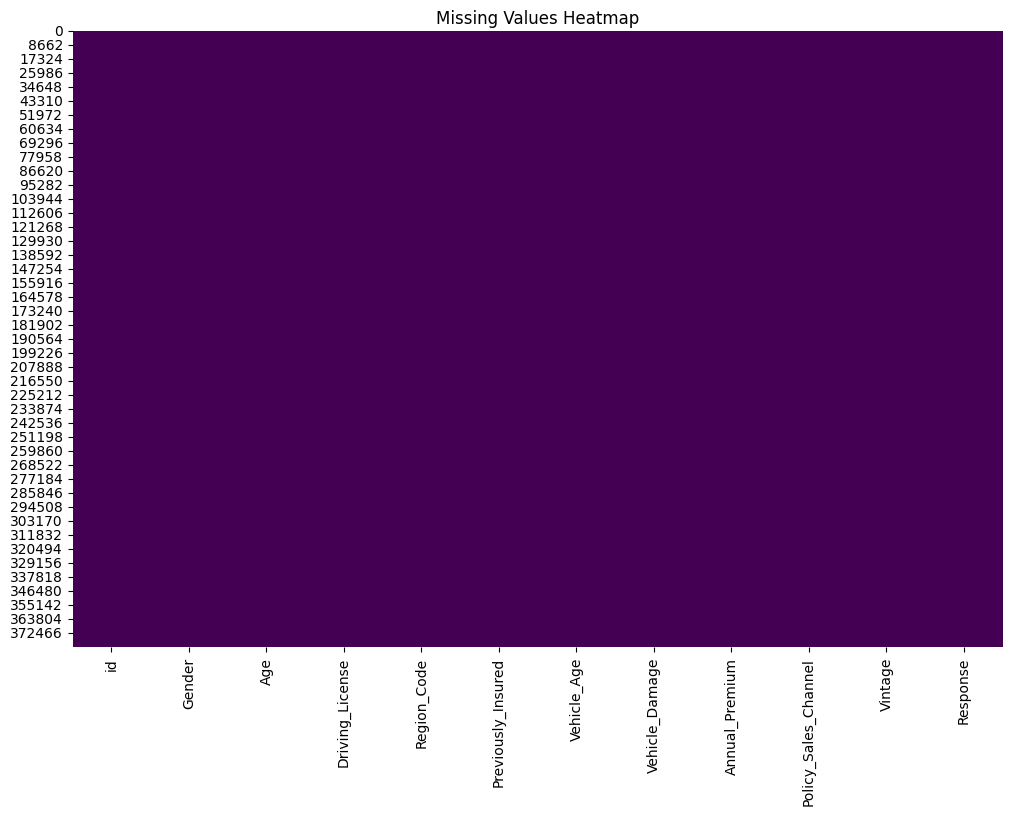

In [6]:
# Step 2: Missing Values Analysis
# ------------------------------------
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

# **Insights from the Dataset**  

### **1. Data Types and Non-null Counts:**  
- The dataset contains **381,109 entries** and **12 columns** with no missing values.  
- **Data Types:**
  - **Numerical Features (float64 & int64)**: Includes columns like *Age, Region_Code, Annual_Premium, Vintage*, etc.  
  - **Categorical Features (object)**: Includes *Gender, Vehicle_Age, Vehicle_Damage*.  
- The dataset is clean with no null values, making it easier for model training without requiring imputation.  

### **2. Summary Statistics:**  

#### **Numerical Features:**  
- **Age**: Ranges from **20 to 85** years, with a mean of **38.8**, indicating a balanced distribution of young and older individuals.  
- **Driving License**: Almost all individuals (**99.79%**) possess a driving license, making this feature less impactful for modeling.  
- **Region_Code**: Has a mean of **26.39**, with values ranging from **0 to 52**, showing diverse geographic representation.  
- **Annual Premium**: The premium amount varies widely (**$2,630 to $540,165**), with a mean of **$30,564**, suggesting some high-value policies.  
- **Previously Insured**: Nearly **46%** of individuals were previously insured, indicating that a significant portion of users are new to insurance.  
- **Vintage** (days since the policy was taken): Ranges from **10 to 299** days, with a mean of **154**, suggesting a mix of new and old policyholders.  
- **Response (Target Variable)**: Only **12.25%** of users responded positively (i.e., showed interest in purchasing insurance), making this a highly imbalanced dataset.  

#### **Categorical Features:**  
- **Gender**: The dataset has **more males (206,089)** than females, which could impact model predictions.  
- **Vehicle Age**: Contains **three unique categories**, with **1-2 years** being the most common, indicating that most vehicles are relatively new.  
- **Vehicle Damage**: **Yes (192,413)** is the most frequent value, meaning a significant number of users have had prior vehicle damage, which may impact insurance pricing.  

### **3. Key Takeaways:**  
- The dataset is **well-structured and balanced** in terms of non-null values.  
- **Highly imbalanced target variable (Response)** – only **12.25%** of users showed interest in insurance.  
- **Annual Premium shows extreme outliers**, which may require transformation (e.g., log scaling).  
- **Region_Code is widely distributed**, indicating users come from diverse regions, which may be an important feature.  
- **Gender imbalance** should be considered while modeling.  
- **Feature engineering** on categorical variables (e.g., *Vehicle_Age, Vehicle_Damage*) may improve prediction accuracy.  

# **Issues to be Addressed Later**  

### **1. Handling Missing Data:**  
- **No Missing Values:** The dataset does not have any missing values, making preprocessing easier.  
- However, categorical variables like **Vehicle_Age** and **Vehicle_Damage** may need to be transformed to improve model performance.  

### **2. Outlier Detection and Handling:**  
- **Annual Premium** has a **wide range ($2,630 to $540,165)**, indicating potential outliers.  
- **Region_Code** spans from **0 to 52**, which may have outlier values requiring further analysis.  
- **Vintage (policy age)** ranges from **10 to 299 days**, suggesting potential differences in customer behavior that may need to be addressed.  
- These outliers may need **log transformation** or **capping techniques** to ensure they don’t skew model predictions.  

### **3. Categorical Encoding:**  
- **Gender, Vehicle_Age, and Vehicle_Damage** are categorical and will require encoding:  
  - **One-hot encoding** could be used for **Vehicle_Age** since it has only 3 categories.  
  - **Label encoding** might be more suitable for **Vehicle_Damage** and **Gender** to avoid dimensionality issues.  
- **Policy_Sales_Channel** has **many unique values (163 categories)** and may require **frequency encoding** or **binning** into broader groups.  

### **4. Feature Engineering:**  
- **Combining related features** like **Previously_Insured and Vehicle_Damage** may help create meaningful insights.  
- **Feature transformations** may be necessary for **Annual Premium** to address skewness.  
- **Interaction terms** between **Vehicle_Age, Previously_Insured, and Response** could help capture underlying relationships.  

### **5. Correlation and Multicollinearity:**  
- **Driving_License is almost always 1 (99.79%)**, making it an insignificant feature for modeling.  
- **Annual_Premium, Age, and Vintage** may have correlations that need to be analyzed before feature selection.  
- **Highly correlated features** (if any) will need **dimensionality reduction** or **feature selection techniques** to avoid multicollinearity issues.  

### **Next Steps:**  
- Perform **correlation analysis** to detect redundant features.  
- Implement **outlier detection** and handle them appropriately.  
- Encode categorical variables based on their impact on the target variable.  
- Engineer new features where necessary to improve model performance.  


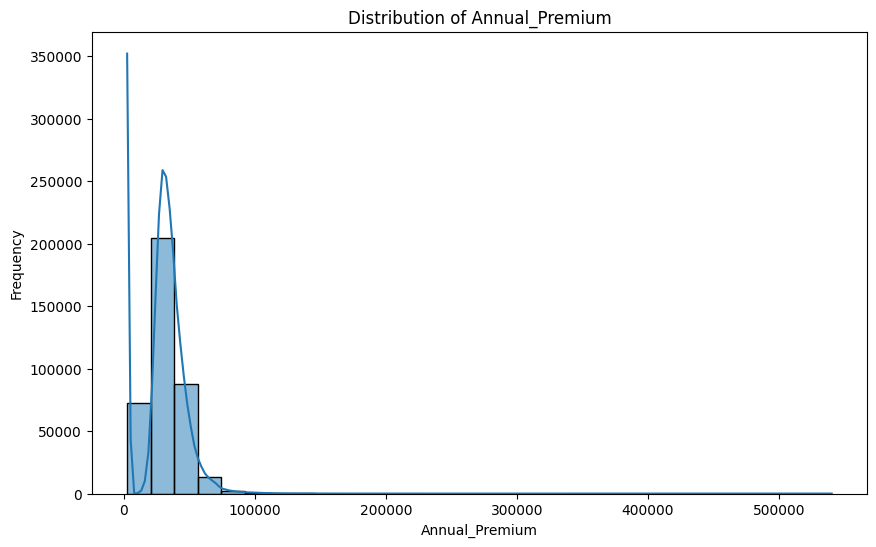

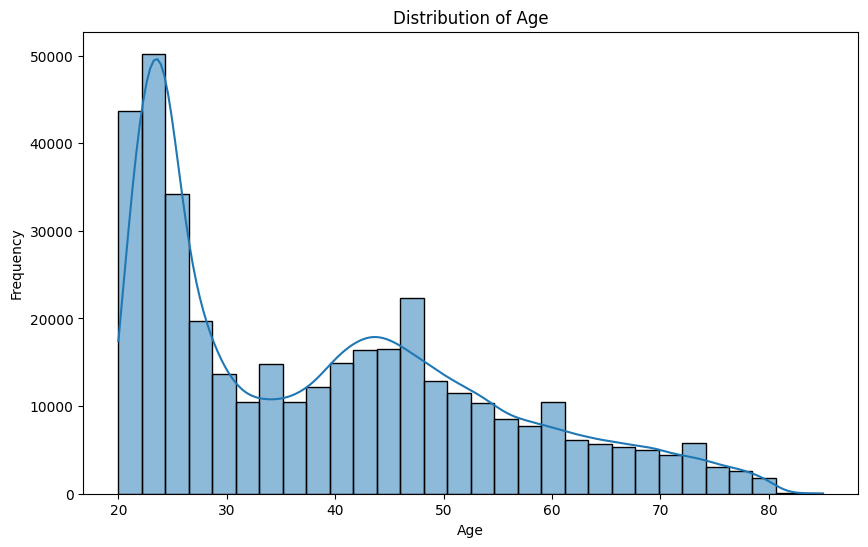

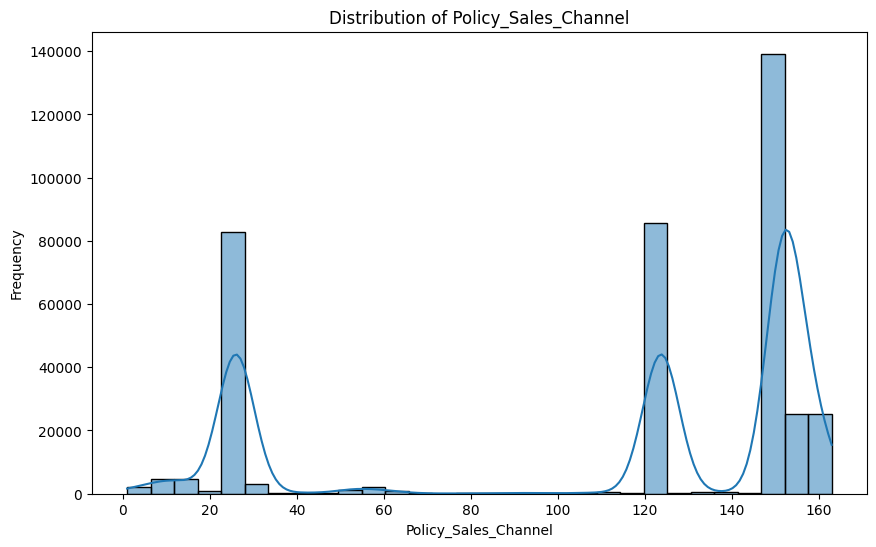

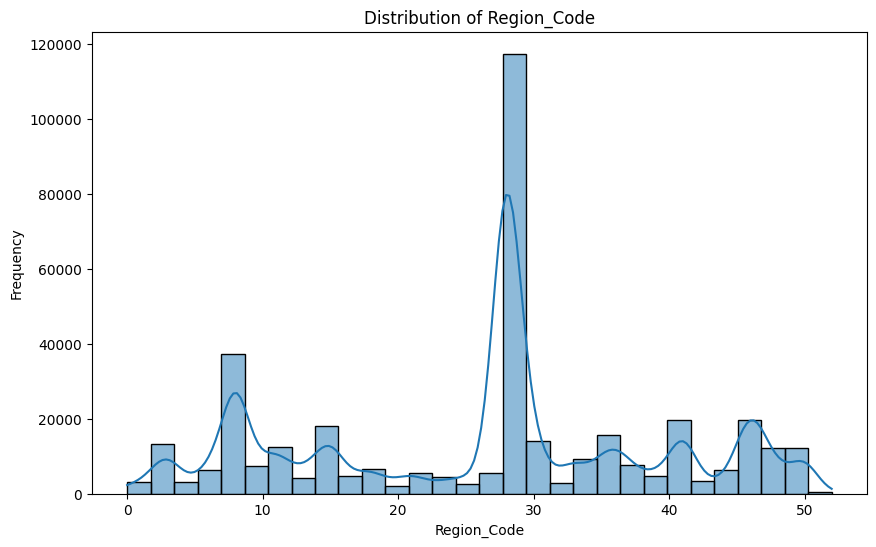

In [9]:
# Step 3: Univariate Analysis
# -----------------------------------
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Annual_Premium')
univariate_analyzer.execute_analysis(df, 'Age')
univariate_analyzer.execute_analysis(df, 'Policy_Sales_Channel')
univariate_analyzer.execute_analysis(df, 'Region_Code')

/Users/mdayanarshad/Desktop/vikash das mlops/MLOps-Vehicle-Insurance-Predictor/analysis/analyze_src/univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


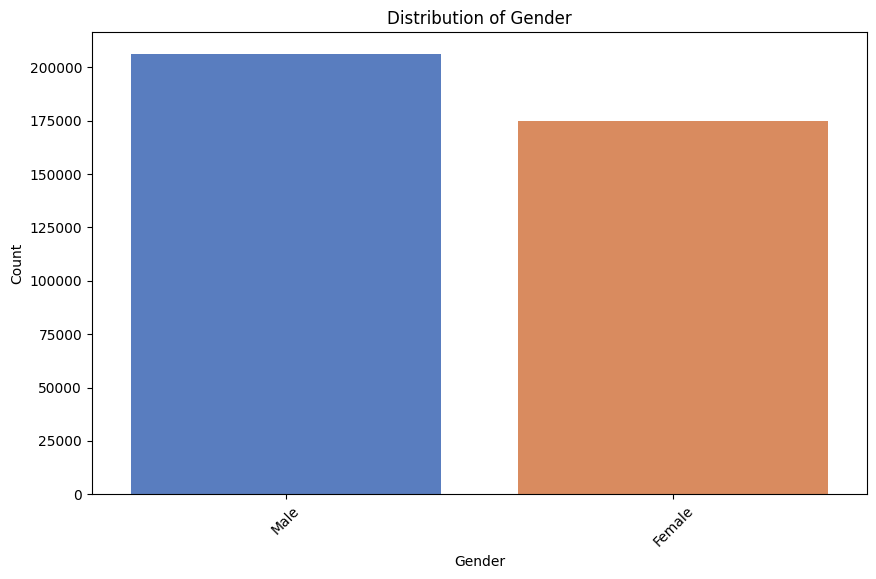

/Users/mdayanarshad/Desktop/vikash das mlops/MLOps-Vehicle-Insurance-Predictor/analysis/analyze_src/univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


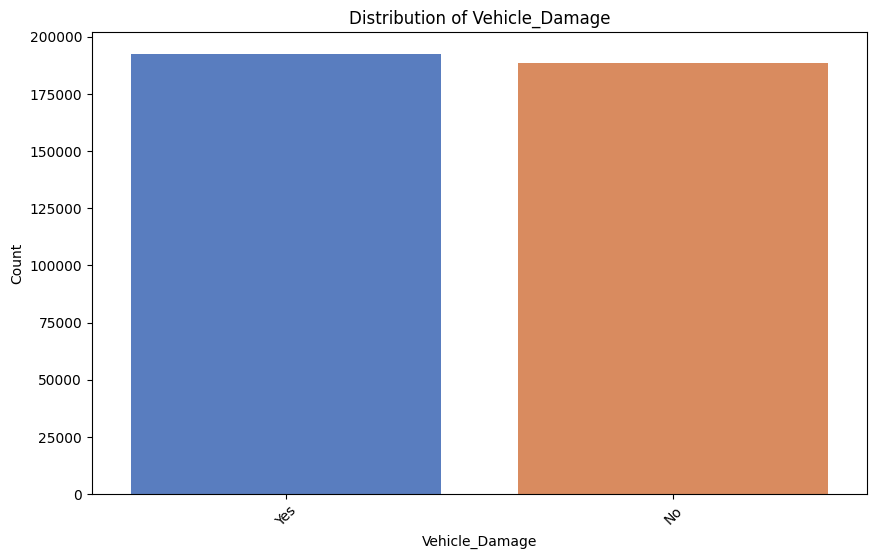

In [10]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Gender')
univariate_analyzer.execute_analysis(df, 'Vehicle_Damage')

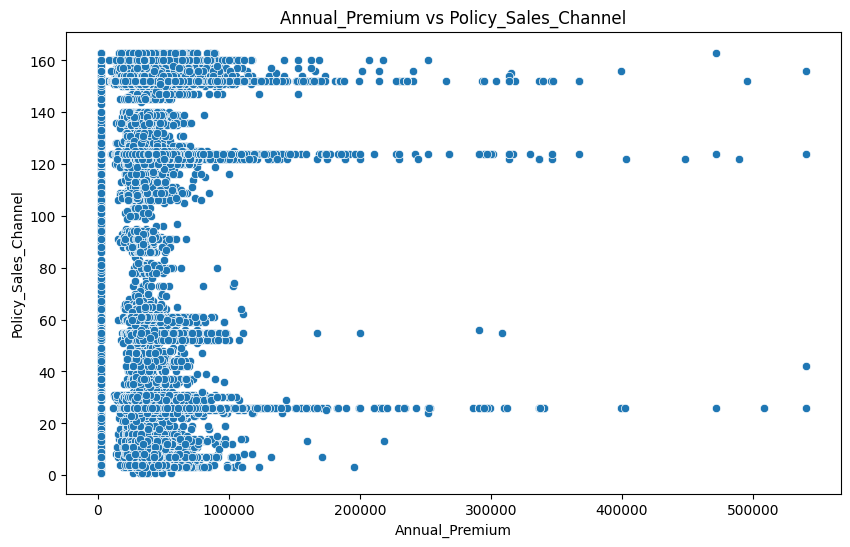

In [11]:
# Step 4: Bivariate Analysis
# -----------------------------------
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Annual_Premium', 'Policy_Sales_Channel')

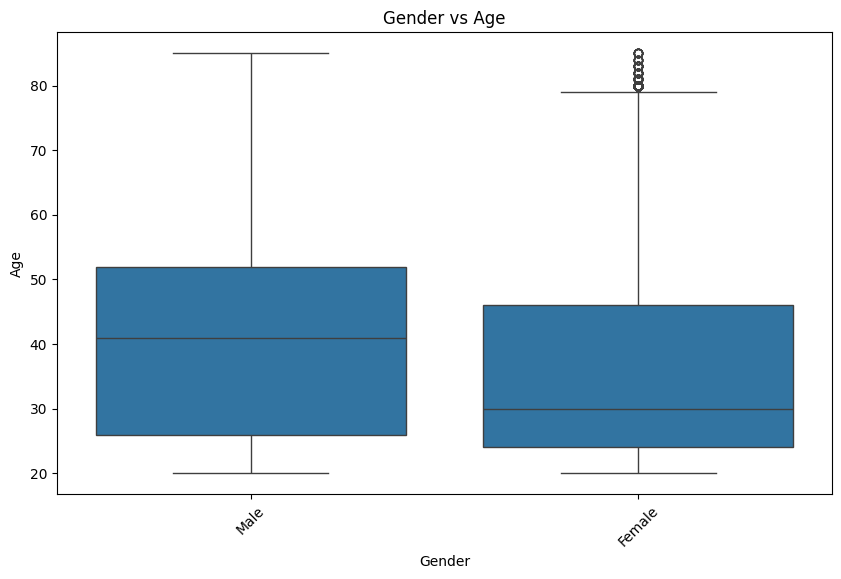

In [14]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Gender', 'Age')

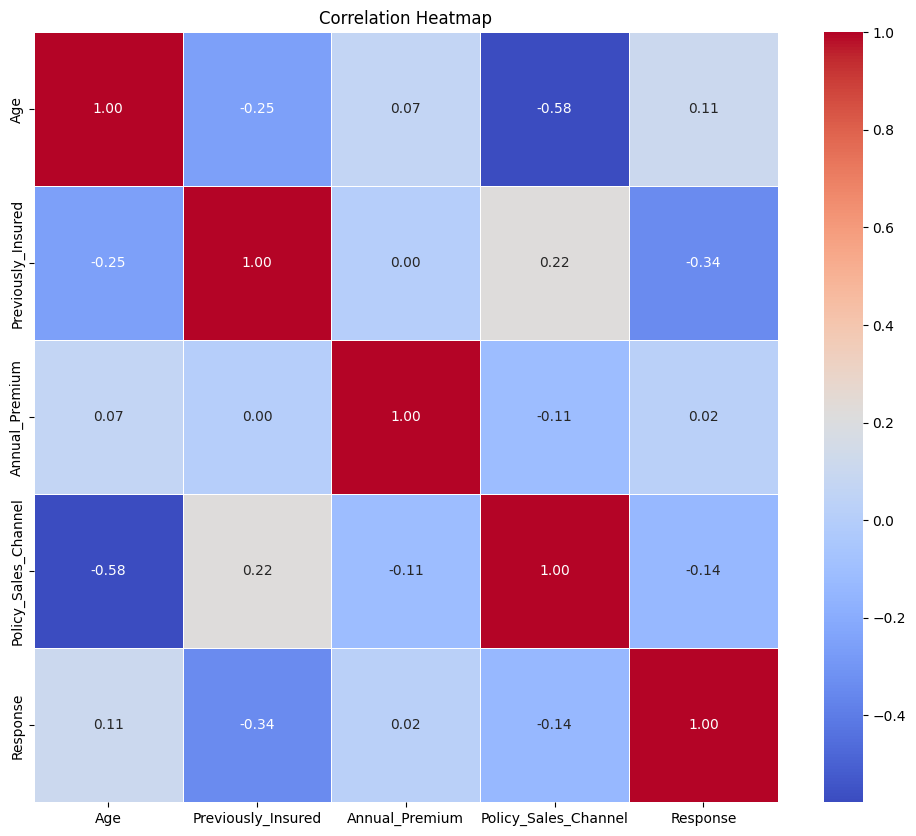

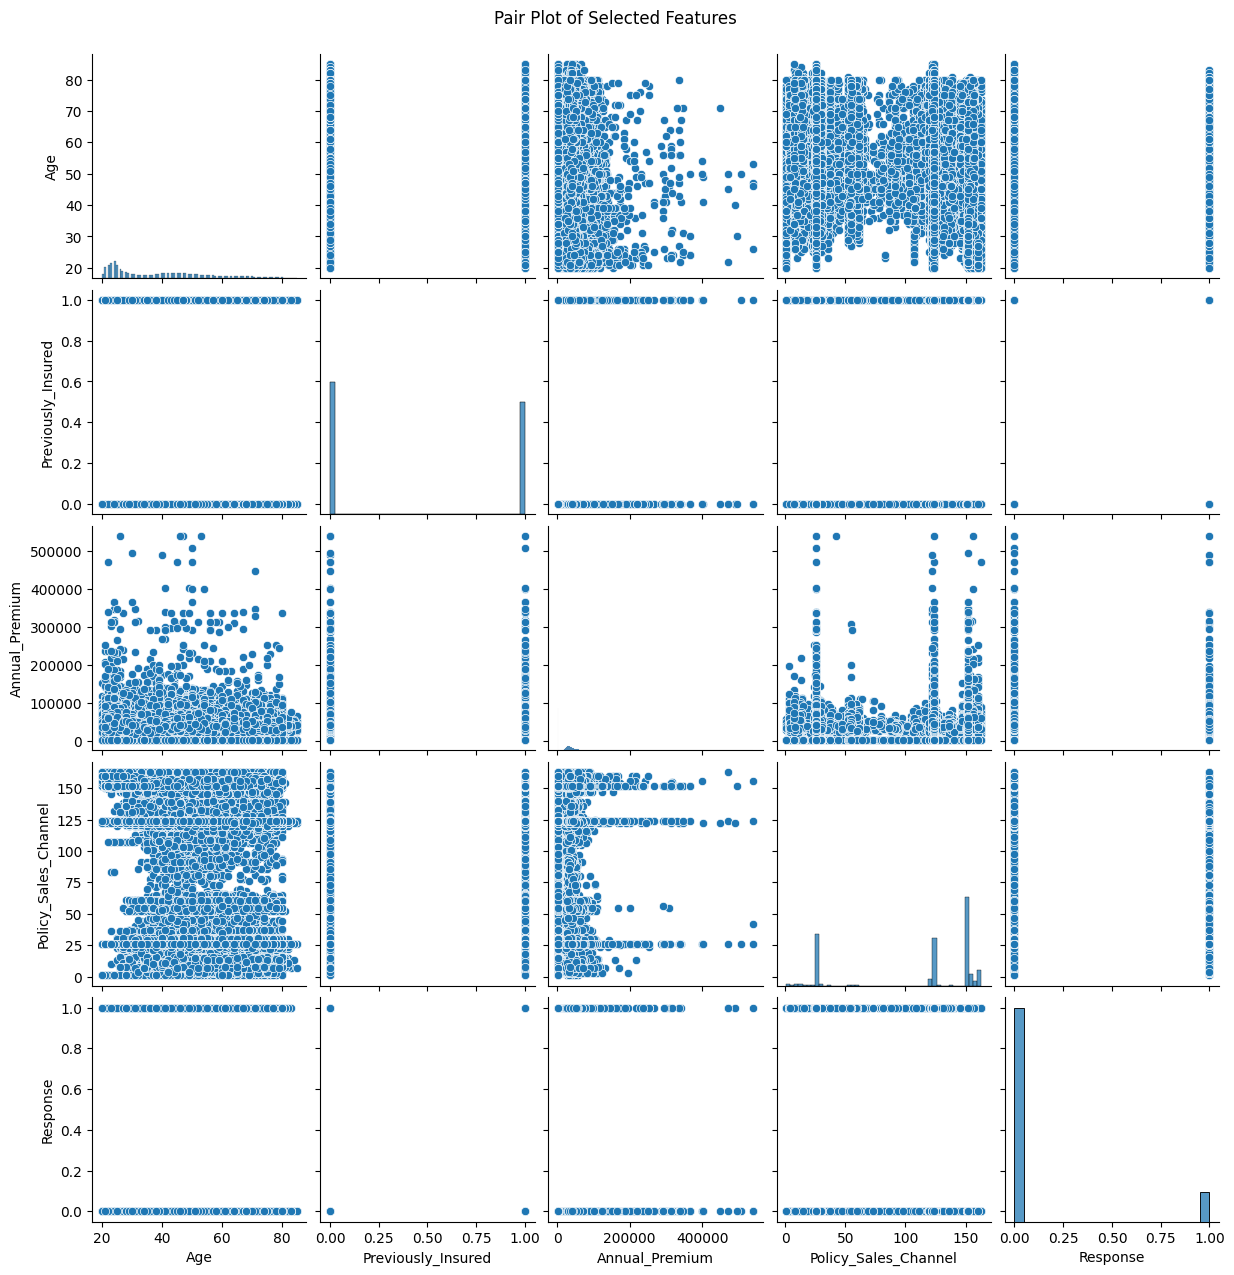

In [21]:
# Step 5: Multivariate Analysis
# ------------------------------
# Perform Multivariate Analysis

# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()

# Select important features for the analysis
selected_features = df[[ 'Age','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Response']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)

# **Insights from the Correlation Heatmap**

### **1. Key Observations:**
- **Age**:
  - Strong negative correlation with **Policy_Sales_Channel** (-0.58), indicating older individuals may prefer different sales channels compared to younger ones.
  - Slight positive correlation with **Response** (0.11), suggesting older individuals might be more likely to respond positively.

- **Previously_Insured**:
  - Moderate negative correlation with **Response** (-0.34), implying that individuals without prior insurance are more likely to respond positively.
  - Low correlation with other features, indicating it's relatively independent.

- **Annual_Premium**:
  - Very low correlation with all other features, suggesting it may not have a strong linear relationship with **Response** or other predictors.

- **Policy_Sales_Channel**:
  - Negative correlation with **Age** (-0.58), showing a preference shift in sales channels based on age.
  - Weak negative correlation with **Response** (-0.14), indicating that some channels might be less effective for customer engagement.

- **Response**:
  - Weak positive correlation with **Age** (0.11) and **Annual_Premium** (0.02), but stronger negative correlation with **Previously_Insured** (-0.34), suggesting prior insurance status significantly impacts customer responses.

### **2. Overall Trends:**
- **Age** and **Policy_Sales_Channel** demonstrate a meaningful relationship, which may require further investigation.
- **Previously_Insured** is a key feature influencing **Response**, as indicated by its moderate negative correlation.
- Most features have weak correlations with **Response**, indicating the potential need for feature engineering or non-linear models to capture more complex relationships.

### **3. Recommendations:**
- Explore **Policy_Sales_Channel** and **Age** interactions further to identify actionable insights.
- Focus on **Previously_Insured** for segmentation strategies, as it significantly impacts the target variable.
- Consider advanced modeling techniques to capture non-linear relationships, as most correlations with **Response** are weak.
